# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:red">  Numerical exercises 2.1: Monte Carlo Integration</span>

In Monte Carlo evaluation of integrals, the integral must have the form:
$$I = \int_{\Omega} g(x)p(x)dx$$
where $p(x)\geq 0 \:\forall x\in\Omega$ and $\int_{\Omega}p(x)dx=1$ i.e. $p(x)$ must be a probability distribution function. In order to evaluate the integral we sample a set of variables $x_1,...,x_N$ from $p(x)$ and we compute the average variable of the function g: $G_N = \frac{1}{N}\sum_{i=1}^N g(x_i)$. The quantity $G_N$ is an estimator of I and its error is the standard deviation of the mean.

In this exercise I've computed via Monte Carlo the following integral:
$$I = \int_0^1 \frac{\pi}{2}\cos\big(\frac{\pi}{2}x\big) dx = 1$$
using both uniform sampling and importance sampling.

$\textbf{1) Uniform Sampling}$

The easiest choice of $g(x)$ and $p(x)$ is the following:
$$g(x) = \frac{\pi}{2}\,\cos\big(\frac{\pi}{2}x\big) \;;\; p(x) = 1$$
So we sample random uniform variables between 0 and 1 (i.e. the integration interval) and we compute the average variable of the whole integrand function.

$\textbf{2) Importance Sampling}$

We can make a better choice for $g(x)$ and $p(x)$ using the trick:
$$I = \int_{\Omega} g(x)p(x)dx = \int_{\Omega} \frac{g(x)p(x)}{d(x)}\,d(x)\,dx$$
where $d(x)\geq 0 \:\forall x\in\Omega$ and $\int_{\Omega}d(x)dx=1$ i.e. $d(x)$ must be a probability distribution. If we choose $d(x)$ more similar to the integrand function than the uniform distribution function we should have a better evaluation of the integral, i.e. we should have a smaller error.

The first function we can think that approximates the integrand is its Taylor expansion, but in our problem this is a bad choice because it is not greater than 0 $\forall x\in[0,1]$, indeed:

$g(x) = \frac{\pi}{2}\,\cos\big(\frac{\pi}{2}x\big) \simeq \frac{\pi}{2}\,\big(1-\frac{\pi^2}{2}\,x^2\big) = d(x)$

We have:

$d(x) = \frac{\pi}{2}\,\big(1-\frac{\pi^2}{2}\,x^2\big) \geq 0 \iff \big(1-\frac{\pi^2}{2}\,x^2\big) \geq 0 \iff \frac{\pi^2}{2}\,x^2 \leq 1 \iff x^2 \leq \frac{2}{\pi^2} \iff -\frac{\sqrt{2}}{\pi} \leq x \leq \frac{\sqrt{2}}{\pi}$

Thus $d(x)$ chosen as the Taylor expansion of $g(x)$ is greater than 0 only up to $\frac{\sqrt{2}}{\pi}$, which is lesser than 1, so $d(x)$ does not satisfy the hypotesis $d(x) \geq 0\:\forall x\in[0,1]$.

By looking at the graph of $g(x)$ we can make a simple choice for $d(x)$: the straight line passing from $(0;\frac{\pi}{2})$ and $(1;0)$ i.e. the function $r(x)=-\frac{\pi}{2} (x-1)$; $r(x)$ satisfies $r(x) \geq 0\:\forall x\in[0,1]$ but we have to normalize this function in order to make it a probability distribution function; we have:

$\int_0^1 N \big(-\frac{\pi}{2}\,(x-1)\big)dx = 1 \iff -N\frac{\pi}{2}\big(\frac{x^2}{2}-x\big)\big\vert_0^1 = 1 \iff -N \frac{\pi}{2} \big(-\frac{1}{2}\big) = 1 \iff N = \frac{4}{\pi}$

We have then obtained our probability density function $d(x)$:
$$d(x) = -2(x-1)$$
In order to sample variables from this distribution we use the inverse cumulative function method:

$D(x) = \int_0^x d(x') \, dx' = -2\int_0^x (x'-1) \, dx' = -2\big(\frac{x'^2}{2}-x'\big)\big\vert_0^x = -x^2+2x$

Let $y=D(x) \in [0,1]$ uniformly distributed, then we have:

$y = -x^2+2x \iff x^2-2x+y = 0 \iff x_{1,2} = 1 \pm \sqrt{1-y}$

and we choose the "-" sign because we want to sample numbers between 0 and 1.

Summing up, we write the integral in the form:
$$I = \int_{\Omega} g(x)p(x)dx = \int_{\Omega} \frac{g(x)p(x)}{d(x)}\,d(x)\,dx$$
where we choose:
$$d(x) = -2(x-1)\;;\;\frac{g(x)p(x)}{d(x)} = \frac{\frac{\pi}{2}\,\cos\big(\frac{\pi}{2}x\big)}{-2(x-1)}\;;\;(p(x)=1)$$
and we sample variables $x_i$ distributed as $d(x)$ using:
$$x = 1 - \sqrt{1-y}$$
where y is uniformly distributed in $[0,1]$.

The graph below shows the evaluation of the integral using uniform sampling (blue line) and importance sampling with the choice I've explained before (red line) as functions of the number of blocks, whereas the green line represents the theoretical value of the integral (which is 1).

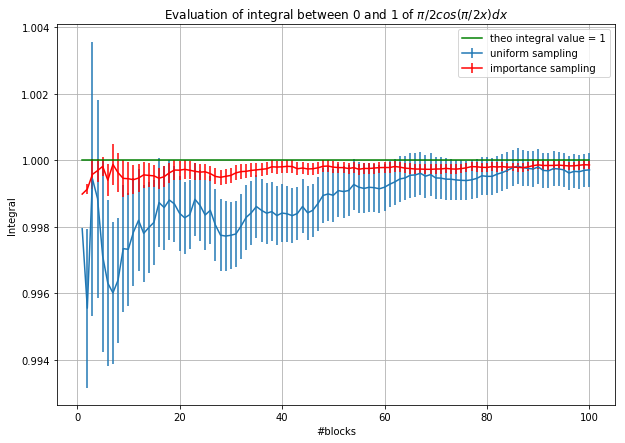

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("Esercizio02.1/uniform_sampling.txt", usecols=(0,1,2), delimiter='	', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,f,yerr=error, label="uniform sampling")
y = np.full(100, 1)
plt.plot(x,y,  'g', label='theo integral value = 1')
plt.xlabel('#blocks')
plt.ylabel('Integral')
plt.title('Evaluation of integral between 0 and 1 of $\pi/2 cos(\pi/2 x)dx$')
plt.grid(True)
x, f, error = np.loadtxt("Esercizio02.1/importance_sampling.txt", usecols=(0,1,2), delimiter='	', unpack='true')
plt.errorbar(x,f,yerr=error, color='r', label="importance sampling")

plt.legend()
plt.show()

It's clear from the comparison between the two lines that the calculation with importance sampling yields a more precise result than the calculation with uniform sampling, indeed the error is reduced by a factor $\sim 5$.

## <span style="color:red">  Numerical exercises 2.2: Random Walks</span>

In this exercise I've simulated two types of 3D Random Walks: discrete and continuos.

$\textbf{Discrete Random Walk}$

In a discrete random walk every step is made of equal length $a$ forward or backward in one of the three axes directions: x, y or z. 

I've realized this simulation by creating a class RW in which the private data members are the values of the three coordinates x, y and z, and there are class methods which increase or decrease these three variables. The call of one of these six methods is made by a uniform extraction between 0 and 6 approximated on the biggest integer smaller than the extracted number, i.e. 

r = rnd.Rannyu(0, 6);

if ((int)r == 0) increaseX;

if ((int)r == 1) decreaseX;

and so on for y and z; this process is made for each step and constitutes the simulation of a discrete random walk.

$\textbf{Continuos Random Walk}$

In a continuos random walk every step is made of equal length $a$ in a random direction in the whole 3D space.

I've realized this simulation by sampling uniformly the solid angle: $\theta\in[0,\pi]$ and $\phi\in[0,2\pi]$. The element of solid angle in spherical coordinates corresponds to $\sin(\theta)d\theta d\phi$, thus the angle $\phi$ is sampled uniformly between $0$ and $2\pi$, while the angle $\theta$ is sampled from the probability distribution function $p(\theta) = \frac{1}{2}\sin(\theta)$ between $0$ and $\pi$ (where the $\frac{1}{2}$ term is the normalization factor). Again, we use the inverse cumulative function method:

$P(\theta) = \int_0^{\theta}\frac{1}{2}\sin(\theta')d\theta' = \frac{1}{2}(-\cos(\theta'))\big\vert_0^{\theta} = \frac{1}{2}(1-\cos(\theta))$

Let $y=P(x) \in [0,1]$ uniformly distributed, then we have:

$y = \frac{1}{2}(1-\cos(\theta)) \iff \cos(\theta) = 1-2y \iff \theta = \arccos(1-2y)$

In conclusion, every step of the random walk is made by:
- sampling $\phi$ uniformly between $0$ and $2\pi$;
- sampling $\theta$ between $0$ and $\pi$ by $\theta = \arccos(1-2y)$, where y is sampled uniformly between 0 and 1;
- converting spherical coordinates to cartesian coordinates and increasing the private data memembers.

This process is made for each step and constitutes the simulation of a continuos random walk.

The program performs several simulations of both discrete and continuos random walks starting from the origin; the two graphs below represent $r = \sqrt{\langle r^2 \rangle}$ (i.e. the distance from the origin) as a function of the number of steps in the random walk.

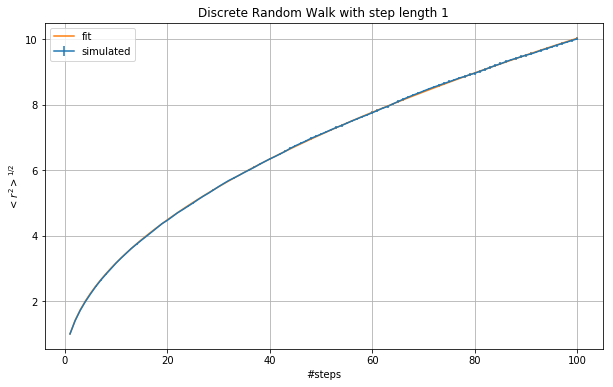

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#square root function for the fit
def square_root(x, k):
    return k*np.sqrt(x)

x, f, error = np.loadtxt("Esercizio02.2/discreteRW.txt", usecols=(0,1,2), delimiter='	', unpack='true')
plt.figure(figsize=(10,6))
plt.errorbar(x,f,yerr=error, label='simulated')

best_vals, covar = curve_fit(square_root, x, f, p0=1)  
plt.plot(x, square_root(x, best_vals), label='fit')

plt.xlabel('#steps')
plt.ylabel('$<r^2>^{1/2}$')
plt.title('Discrete Random Walk with step length 1')
plt.grid(True)
plt.legend()

plt.show()

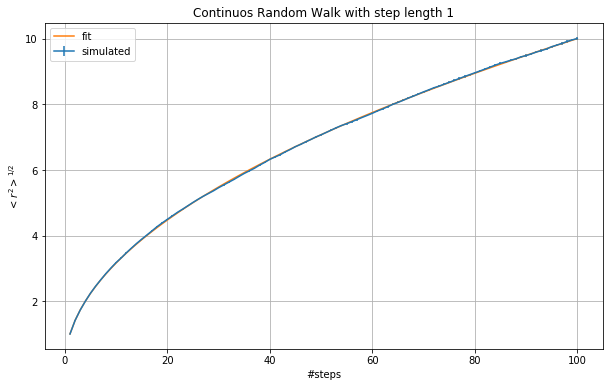

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f, error = np.loadtxt("Esercizio02.2/continuosRW.txt", usecols=(0,1,2), delimiter='	', unpack='true')
plt.figure(figsize=(10,6))
plt.errorbar(x,f,yerr=error, label='simulated')

best_vals, covar = curve_fit(square_root, x, f, p0=1)  
plt.plot(x, square_root(x, best_vals), label='fit')

plt.xlabel('#steps')
plt.ylabel('$<r^2>^{1/2}$')
plt.title('Continuos Random Walk with step length 1')
plt.grid(True)
plt.legend()

plt.show()

Both graphs are perfectly fitted with a function like $f(N) = k\sqrt{N}\;$, thus both types of random walks starting from a fixed point show a diffusive behaviour.